# (US air force on-time and delayed flights analysis)
## by (Mahmoud Samneh)

## Investigation Overview

> Through this analysis we will highlight and study the flights movment through each airport from the 2017 till 2020 we will be exposed to each factor that influnces the flights movment.

>we will focus on many aspects to analyse the dataset and to extract insights that will help us improve the flight's movement through this project we will focus on the below study cases.

>Case study 1: what is the portion of canceled and diverted of top ten airports?
>Case study 2: Through 2017 till 2020 are delayed flights increase or decrease?
>Case study 3: For each airport what is the delaying factor for the flights?
>Case study 4: For the airports with the highest value of delayed flights what is the cause that contributed the most ?

## Dataset Overview

> the data  consist of flights movment through  all us airports from 2017 till 2020 which have all the data related to delyaed cancelled and on time flights

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
flights  = pd.read_csv('flights_dataset.csv')
flights.drop('Unnamed: 21',axis=1, inplace = True)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

Case study 1: what is the portion of canceled and diverted of top ten airports?


>By answering this question we will demonstrate the percentage of cancelled and diverted flights the percentages yields the performance of the airport in general and it shows how each airport stand to each other

In [5]:
#prepare the data 

topten_portions = flights.groupby('airport').sum('arr_flights')

topten_portions['cancelled_diverted_portion'] = (topten_portions['arr_diverted'] + topten_portions['arr_cancelled']) / topten_portions['arr_flights']

topten_portions.sort_values('cancelled_diverted_portion', ascending = False, inplace = True)

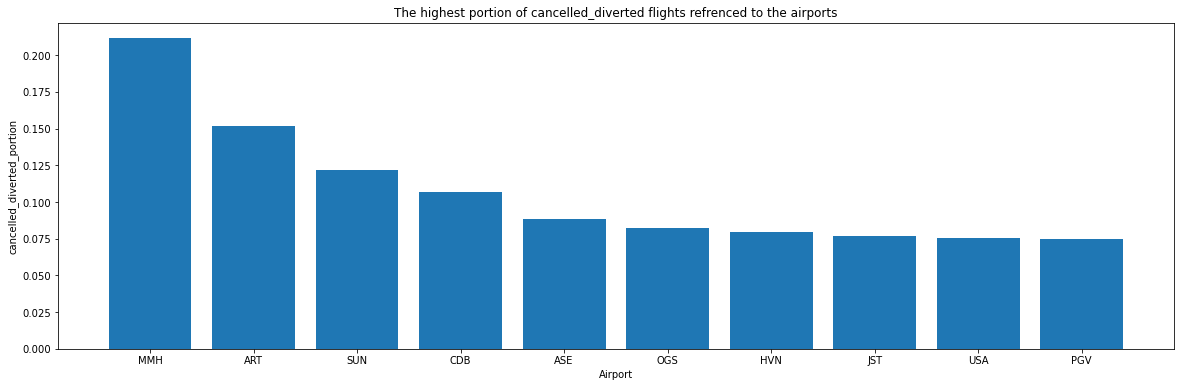

In [6]:
#visualizing for the top ten airports 
x = topten_portions.head(10).reset_index()

plt.figure(figsize=(20, 6))
plt.bar(x['airport'],x['cancelled_diverted_portion']);
plt.xlabel('Airport');
plt.ylabel('cancelled_diverted_portion');
plt.title('The highest portion of cancelled_diverted flights refrenced to the airports');

From the previous bar chart we found the airports that has the highest not arrival flights which will make the passengers think twice when they see these names once they book there flights , a bad trend for revenue which needs to do gap analysis

Case study 2: Through 2017 till 2020 are delayed flights increase or decrease?


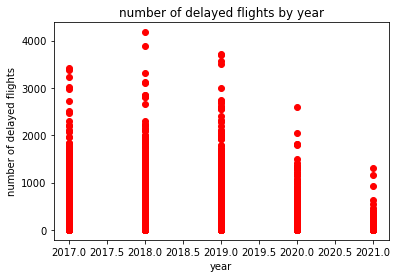

In [8]:
#visualizing the required data between year and arr_del15 coulumn

plt.figure(figsize=[14.7,8.27])
sb.stripplot(data = flights, x = 'year', y='arr_del15', color = 'r',jitter=0.35)
plt.title('number of delayed flights by year')
plt.xlabel('year')
plt.ylabel('number of delayed flights');

As we can see from the scatter chart that number of flights through all the airports is being reduced which is a good indicator

Case study 3: For each airport what is the delaying factor for the flights?

In [10]:
# preparing the data 

delayed_factor = [{'Total':flights[' carrier_delay'].sum()},{'Total':flights['weather_delay'].sum()},
                  {'Total':flights['nas_delay'].sum()},{'Total':flights['security_delay'].sum()},
                  {'Total':flights['late_aircraft_delay'].sum()}]

delayed_factor = pd.DataFrame(delayed_factor,index =['carrier_delay','weather_delay',
                                                   'nas_delay','security_delay','late_aircraft_delay'],columns =['Total'])
delayed_factor

,Total
carrier_delay,88386538.0
weather_delay,15123960.0
nas_delay,67445580.0
security_delay,424975.0
late_aircraft_delay,107059704.0


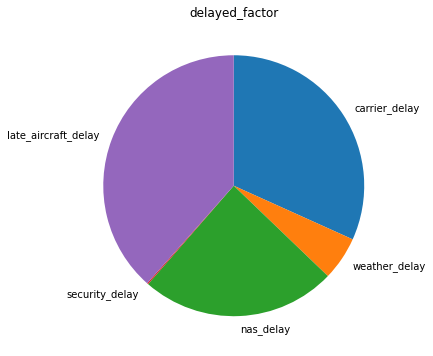

In [13]:
plt.figure(figsize=(20, 6))
plt.pie(delayed_factor['Total'], labels = delayed_factor.index, startangle = 90, counterclock = False,);
plt.title('delayed_factor');

Through this pie chart we found that late_aircraft and carrier are the most affective factors for delaying the flights we need to dig deep to reduce this delay

 Case study 4: for the airports with the highest value of delayed flights what is the cause that contributed the most ?

In [14]:
#preparing the data 

topten_delayed = flights.groupby('airport').sum('arr_flights')
topten_delayed['portion_of_delayed_flights'] = topten_delayed['arr_del15'] / topten_delayed['arr_flights']
top_delayed = topten_delayed.sort_values('portion_of_delayed_flights', ascending = False)
top_delayed.reset_index(inplace = True)
top_delayed = top_delayed.head(10)
top_delayed

,airport,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,portion_of_delayed_flights
0,YNG,2018,1,2.0,2.0,1.39,0.00,0.61,0.00,0.00,0.0,0.0,119.0,97.0,0.0,22.0,0.0,0.0,1.000000
1,UST,10085,30,66.0,29.0,3.76,0.00,8.11,0.00,17.10,0.0,0.0,2933.0,359.0,0.0,824.0,0.0,1750.0,0.439394
2,CDB,18181,69,150.0,62.0,5.30,1.37,25.58,11.03,18.72,5.0,11.0,2209.0,261.0,39.0,664.0,325.0,920.0,0.413333
3,PSE,82748,251,2544.0,778.0,370.89,12.06,107.39,1.61,286.02,109.0,9.0,52178.0,22882.0,853.0,4935.0,68.0,23440.0,0.305818
4,BQN,242184,735,6554.0,1903.0,721.51,38.24,411.59,4.72,726.96,223.0,6.0,122284.0,45381.0,3514.0,19613.0,335.0,53441.0,0.290357
5,PGV,24220,102,976.0,264.0,99.36,19.32,42.30,0.06,102.98,67.0,6.0,19420.0,6163.0,1859.0,1595.0,10.0,9793.0,0.270492
6,EWR,1186935,3700,469682.0,125552.0,18722.96,2729.68,77147.19,97.30,26854.80,15871.0,1650.0,9857298.0,1705121.0,315734.0,5429918.0,5462.0,2401063.0,0.267313
7,OTH,98909,313,1392.0,370.0,94.30,12.71,56.82,0.29,205.83,69.0,33.0,26802.0,8184.0,629.0,2936.0,6.0,15047.0,0.265805
8,FLO,10090,17,170.0,40.0,17.33,0.34,8.04,0.00,14.30,2.0,0.0,2589.0,1025.0,46.0,263.0,0.0,1255.0,0.235294
9,SFO,922460,2902,616865.0,144897.0,26406.37,3692.03,75376.03,161.24,39261.38,14485.0,1576.0,10555195.0,2233528.0,351846.0,4917771.0,10169.0,3041881.0,0.234893


In [15]:
top = top_delayed[['airport','carrier_ct',' weather_ct','nas_ct','security_ct','late_aircraft_ct']]
top.set_index('airport',inplace = True)
top

,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct
airport,,,,,
YNG,1.39,0.00,0.61,0.00,0.00
UST,3.76,0.00,8.11,0.00,17.10
CDB,5.30,1.37,25.58,11.03,18.72
PSE,370.89,12.06,107.39,1.61,286.02
BQN,721.51,38.24,411.59,4.72,726.96
PGV,99.36,19.32,42.30,0.06,102.98
EWR,18722.96,2729.68,77147.19,97.30,26854.80
OTH,94.30,12.71,56.82,0.29,205.83
FLO,17.33,0.34,8.04,0.00,14.30


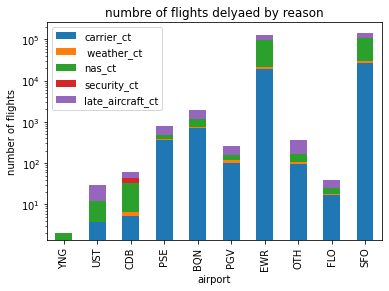

In [16]:
top[["carrier_ct", ' weather_ct','nas_ct','security_ct','late_aircraft_ct']].plot(kind="bar", stacked=True,logy=True)
plt.title('numbre of flights delyaed by reason')
plt.xlabel('airport')
plt.ylabel('number of flights');

From the above chart analysis we found out the carrier was the delaying factor for most of the flights

In [ ]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve  --no-input --no-prompt